**Importing** **libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
cm = sb.light_palette("blue", as_cmap=True)
import matplotlib.pyplot as plt
import altair as alt
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
from plotly.offline import iplot
import plotly.graph_objs as go


**Reading the data**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/matches.csv')

In [ ]:
de=pd.read_csv('/content/drive/MyDrive/deliveries.csv')

**Viewing 5 rows of df**

In [ ]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
de.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


**Basic statistics of df**

In [ ]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
de.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


**Basic info of df**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

**Number of null values in each row**



In [ ]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
de.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
col_with_missing=np.where(df['city'].isnull()==True)
col_with_missing


(array([461, 462, 466, 468, 469, 474, 476]),)

**Fill Null values in ‘city’ column based on ‘venues’ values**

In [ ]:
df['city'].fillna(df['venue'],inplace=True)
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


**Unique value in team1 column**

In [ ]:
df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
df.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
df.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)

**Replace string columns to numeric values**

In [ ]:
label_result=LabelEncoder()

In [ ]:
df['result']=label_result.fit_transform(df['result'])

In [ ]:
label_toss_decision=LabelEncoder()

In [ ]:
df['toss_decision']=label_toss_decision.fit_transform(df['toss_decision'])
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,1,1,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,1,1,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,1,1,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,1,1,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,0,1,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,1,1,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,0,1,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,1,1,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,1,1,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


**Drop insignificant columns having very large missing values**

In [ ]:
df.drop(['umpire3'],axis='columns',inplace=True)

In [ ]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,1,1,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,1,1,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,1,1,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,1,1,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,0,1,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,1,1,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,0,1,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,1,1,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,1,1,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


**Drop all rows where winner values are missing**

In [ ]:
np.where(df['winner'].notna()==False)

(array([300, 545, 570, 744]),)

In [ ]:
df.drop([df.index[300],df.index[545],df.index[570],df.index[744]],inplace=True)

**What is the maximum number of wins by any team in particular seasons?**

In [ ]:
team = df.groupby('season')['winner'].value_counts()
team

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [ ]:
year = 2008
win_per_season = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in team.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season = win_per_season.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [ ]:
win_per_season

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



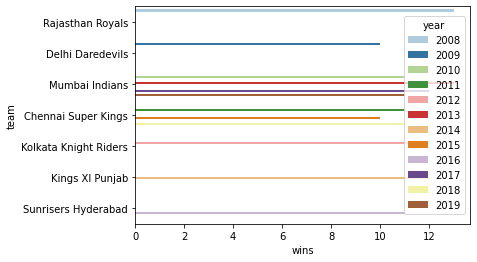

In [ ]:
sb.barplot('wins', 'team', hue='year', data=win_per_season, palette='Paired')

**Which stadium hosted the most number of IPL matches?**

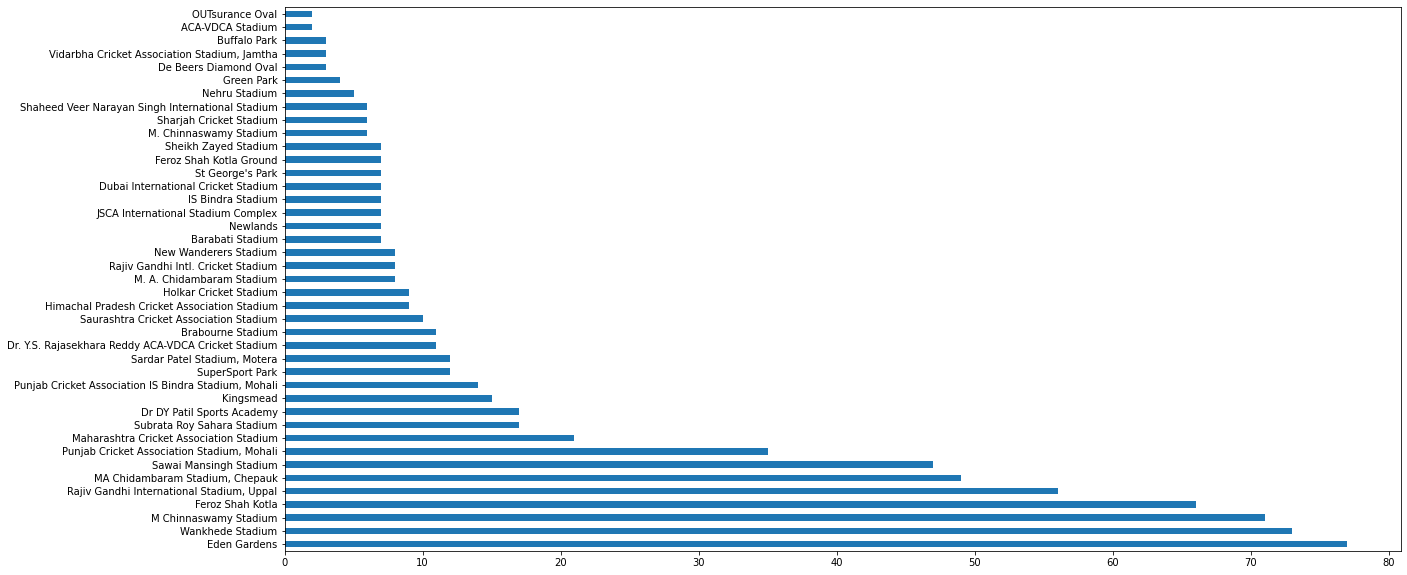

In [ ]:
df['venue'].value_counts().plot(kind='barh',figsize=(20,10))

In [ ]:
import random
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

In [ ]:
most_venue_plot = [go.Bar(
    x = df['venue'].value_counts().index,
    y = df['venue'].value_counts().values,
    marker = dict(color = random_colors(len(df['venue'].value_counts().index)),line=dict(color='#000000', width=1))
)]

layout = go.Layout(
    autosize=False,
                      width=1000,
                      height=600,
                      title='Most IPL Matches hosted by stadium',
                      xaxis = dict(title='venue'),
                      yaxis = dict(title='matches'),template = 'presentation',
                                         margin=go.layout.Margin(
                                                    l=100,
                                                    r=50,
                                                    b=200,
                                                    t=100,
                                                    pad = 4
                                                )
)

fig = go.Figure(data=most_venue_plot,layout = layout)
iplot(fig)

**Which team has won the most number of matches?**

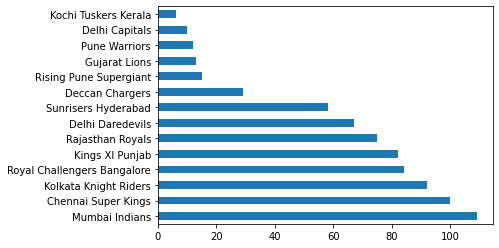

In [ ]:
df['winner'].value_counts().plot(kind='barh')

In [ ]:
most_win_plot = [go.Bar(
    x = df['winner'].value_counts().index,
    y = df['winner'].value_counts().values,
    marker = dict(color = random_colors(len(df['winner'].value_counts().index)),line=dict(color='#000000', width=1))
)]

layout = go.Layout(
    autosize=False,
                      width=1000,
                      height=600,
                      title='Most wins by team',
                      xaxis = dict(title='Team'),
                      yaxis = dict(title='matches'),template = 'presentation',
                                         margin=go.layout.Margin(
                                                    l=100,
                                                    r=50,
                                                    b=200,
                                                    t=100,
                                                    pad = 4
                                                )
)

fig = go.Figure(data=most_win_plot,layout = layout)
iplot(fig)

**Which team has won the most percentage of matches?**

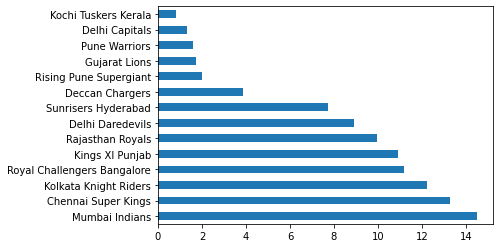

In [ ]:
((df['winner'].value_counts()/df['winner'].value_counts().sum())*100).plot(kind='barh')

**Which player has won the most number of Man of the Match (MoM) awards?**

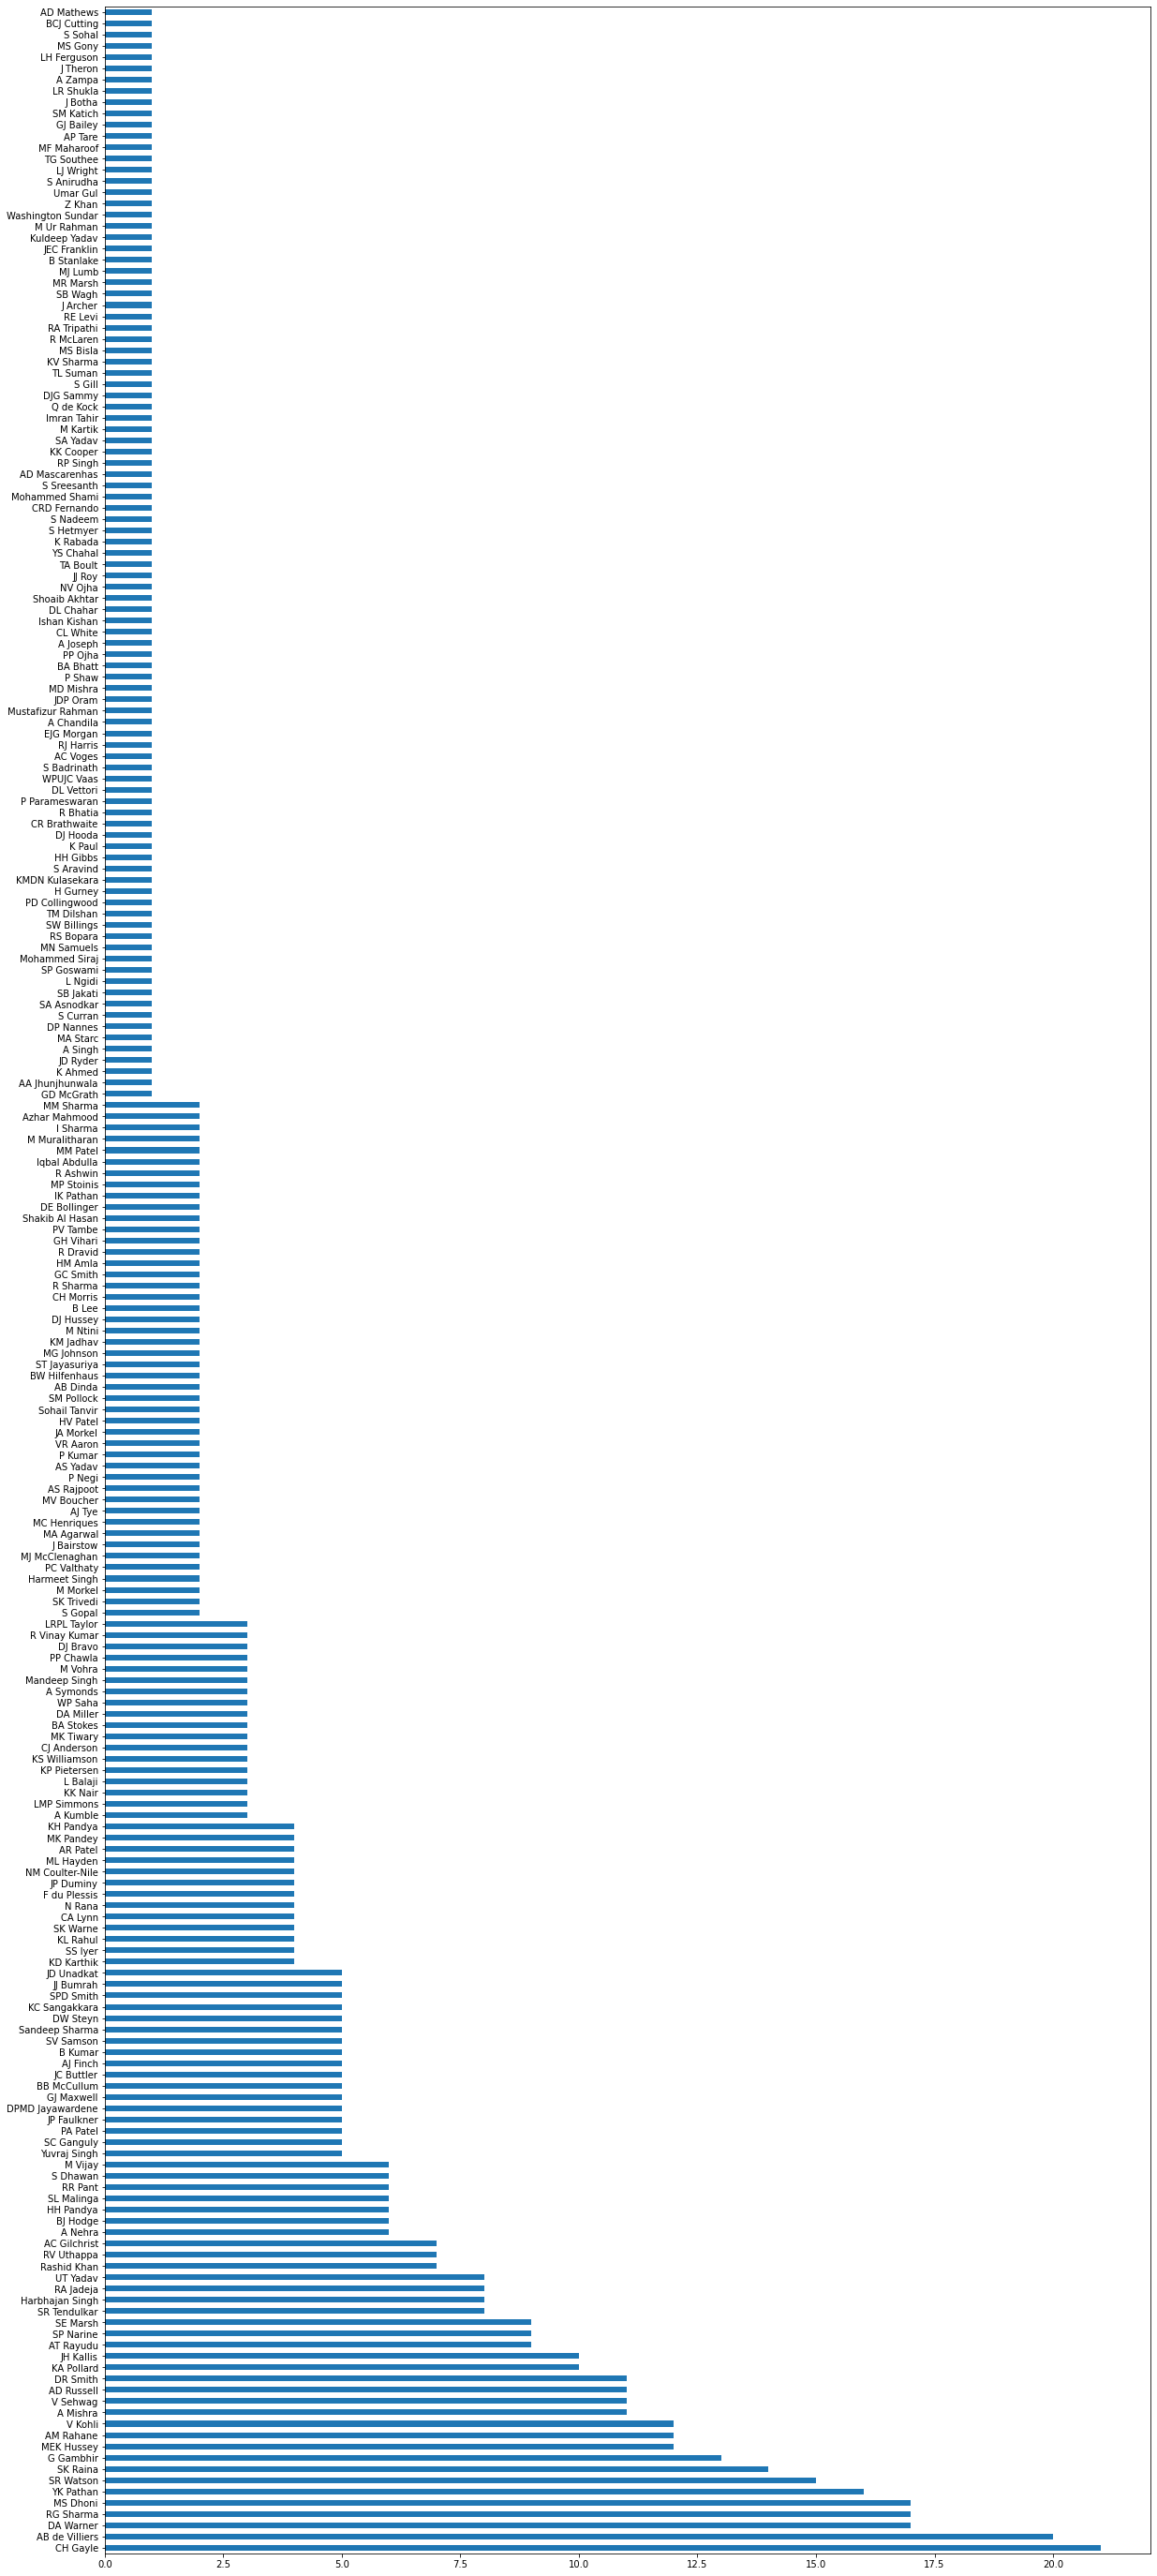

In [ ]:
df['player_of_match'].value_counts().plot(kind='barh',figsize=(20,50))

In [ ]:
df.player_of_match.unique()

array(['Yuvraj Singh', 'SPD Smith', 'CA Lynn', 'GJ Maxwell', 'KM Jadhav',
       'Rashid Khan', 'N Rana', 'AR Patel', 'SV Samson', 'JJ Bumrah',
       'SP Narine', 'KA Pollard', 'AJ Tye', 'RV Uthappa', 'CJ Anderson',
       'BA Stokes', 'NM Coulter-Nile', 'B Kumar', 'CH Gayle',
       'KS Williamson', 'JC Buttler', 'SK Raina', 'MJ McClenaghan',
       'MS Dhoni', 'HM Amla', 'G Gambhir', 'LH Ferguson', 'KH Pandya',
       'Sandeep Sharma', 'DA Warner', 'RG Sharma', 'Mohammed Shami',
       'RA Tripathi', 'RR Pant', 'JD Unadkat', 'LMP Simmons', 'DR Smith',
       'S Dhawan', 'MM Sharma', 'SS Iyer', 'WP Saha', 'KK Nair',
       'Mohammed Siraj', 'AT Rayudu', 'HV Patel', 'Washington Sundar',
       'KV Sharma', 'BB McCullum', 'MEK Hussey', 'MF Maharoof',
       'MV Boucher', 'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden',
       'YK Pathan', 'KC Sangakkara', 'JDP Oram', 'AC Gilchrist',
       'SM Katich', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'R Vinay Kumar', 

**Which team has won the most number of tosses?**

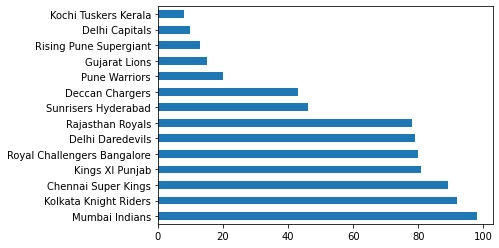

In [ ]:
df['toss_winner'].value_counts().plot(kind='barh')

**Which team has won the most percentage of tosses?**

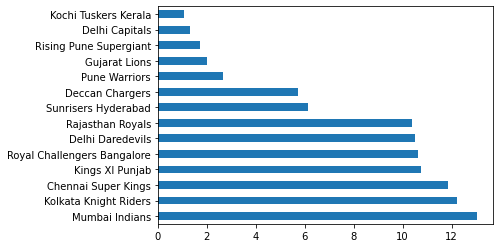

In [ ]:
((df['toss_winner'].value_counts()/df['toss_winner'].value_counts().sum())*100).plot(kind='barh')

**Most 50s and 100s scored**

In [ ]:
cen = de.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
cen = cen[cen['batsman_runs']>=100]
cen = cen.groupby(['batsman']).agg({'count'})
cen.columns = cen.columns.droplevel()
cen = cen.sort_values(by='count',ascending=False).reset_index()
half_cen = de.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_cen = half_cen[half_cen['batsman_runs']>=50]
half_cen = half_cen[half_cen['batsman_runs']<100]
half_cen = half_cen.groupby(['batsman']).agg({'count'})
half_cen.columns = half_cen.columns.droplevel()
half_cen = half_cen.sort_values(by='count',ascending=False).reset_index()

In [ ]:
df_big = pd.merge(cen,half_cen, on='batsman',how='right')
df_big = df_big.fillna(0)
df_big

,batsman,count_x,count_y
0,DA Warner,4.0,44
1,V Kohli,5.0,38
2,SK Raina,1.0,38
3,S Dhawan,0.0,37
4,RG Sharma,1.0,36
...,...,...,...
144,S Vidyut,0.0,1
145,SA Yadav,0.0,1
146,DJ Hooda,0.0,1
147,LA Pomersbach,0.0,1


In [ ]:
df_big.rename(columns = {'count_x' : '100s', 'count_y' : '50s'},inplace=True)

In [ ]:
centuries = df_big.sort_values(by='100s',ascending=False).head(30)
half_centuries = df_big.sort_values(by='50s',ascending=False).head(30)

In [ ]:
fig = {"data" : [{"x" : centuries["batsman"],"y" : centuries["100s"],
                  "name" : "100s","marker" : {"color" : "lightblue","size": 12},
                  "line": {"width" : 3},"type" : "scatter","mode" : "lines+markers" ,
                  "xaxis" : "x1","yaxis" : "y1"},
        
                 {"x" : half_centuries["batsman"],"y" : half_centuries["50s"],
                  "name" : "50s","marker" : {"color" : "brown","size": 12},
                  "type" : "scatter","line": {"width" : 3},"mode" : "lines+markers",
                  "xaxis" : "x2","yaxis" : "y2"}],
       
        "layout" : {"title": "Total centuries and half-centuries by top batsman",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : True},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.55, 1],"anchor" : "x2","title": "50s"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear',"title": "Batsman"},
                    "yaxis" : {"domain" :[0, .45], "anchor" : "x2","title": "100s"}}}

iplot(fig)

**Bi-histogram plot for some Team1 vs Team2 with x axis as different years**

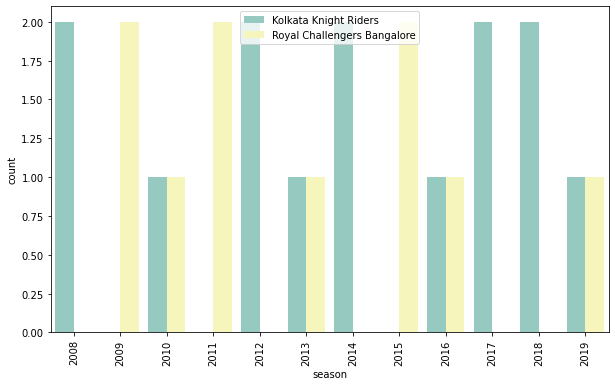

In [ ]:
def team1_vs_team2(team1,team2):
    mt1=df[((df['team1']==team1)|(df['team2']==team1))&((df['team1']==team2)|(df['team2']==team2))]
    sb.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    plt.xticks(rotation='vertical')
    leg = plt.legend( loc = 'upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()
team1_vs_team2('Kolkata Knight Riders','Royal Challengers Bangalore')

**Scatter plot with y-axis as mean strike rate per over, x-axis as number of over**

In [ ]:
key='batsman'
topbatsmen=de[key].value_counts()[:50].index

In [ ]:
df_=de.pivot_table(index=['batsman','over'],aggfunc=['count','sum'],values='batsman_runs'
                  )

df_=df_.fillna(0).reset_index()
df_.columns=['batsman','over','balls','runs']
df_['strike_rate']=round(df_.runs/df_.balls*100,1)


In [ ]:
alt.data_transformers.disable_max_rows()

df_.columns
alt.Chart(df_[df_.batsman.isin(topbatsmen)]).mark_point(shape="circle").encode(
alt.X('over'),
alt.Y('mean(strike_rate)'),
color='batsman',
text="batsman",
size='balls',
opacity='runs',
tooltip=list(df_.columns)
).properties(width=600,height=500)

alt.Chart(...)